## Request

Get all data from the database `https://mcscertified.com/find-an-installer/`

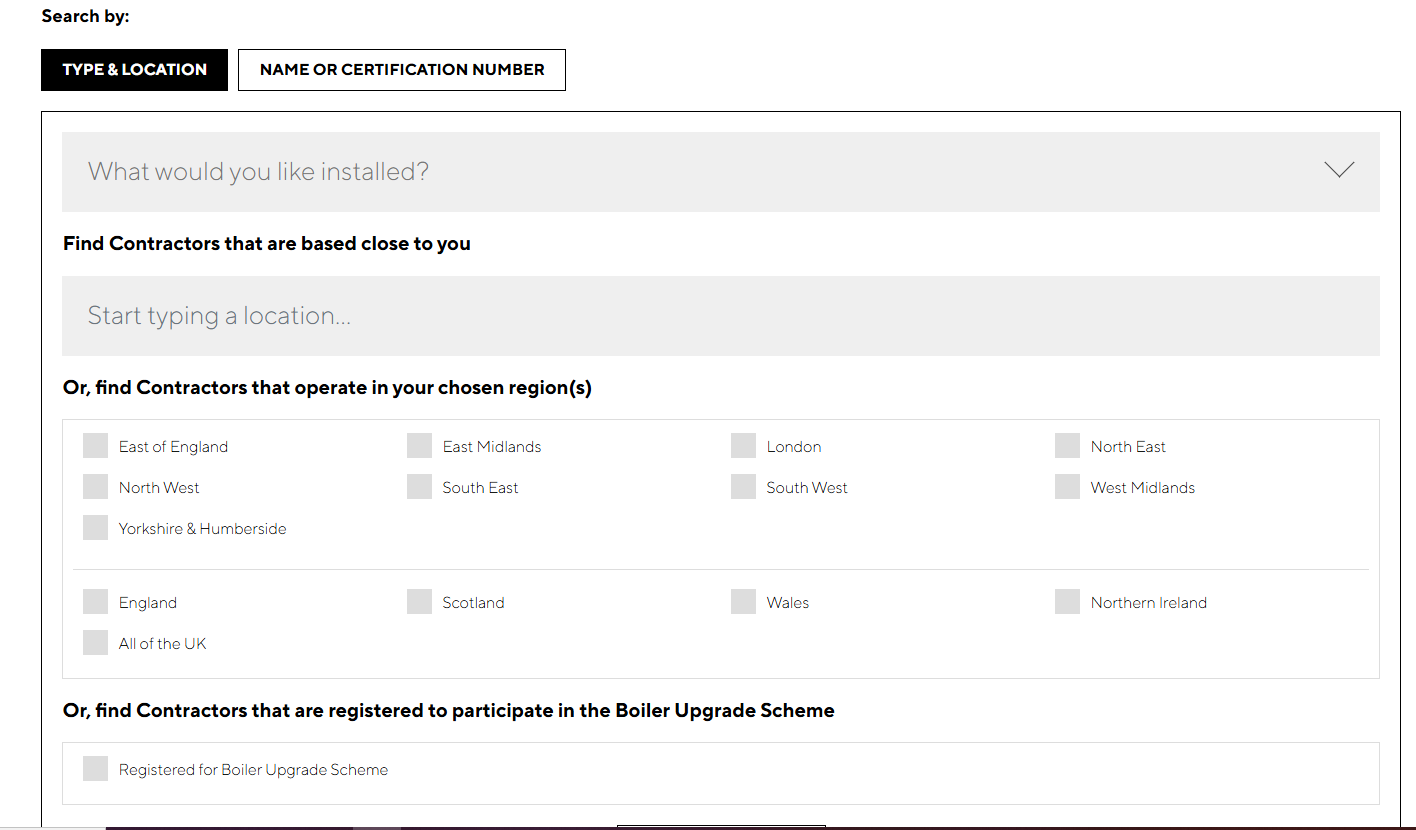

## Analysis

Website uses API cal `https://mcs-website-widget.solsticecloud.com//Search/Search_Installers_TypeAndLocation` to collect data, we can use the same API for all tech installations, and all regions

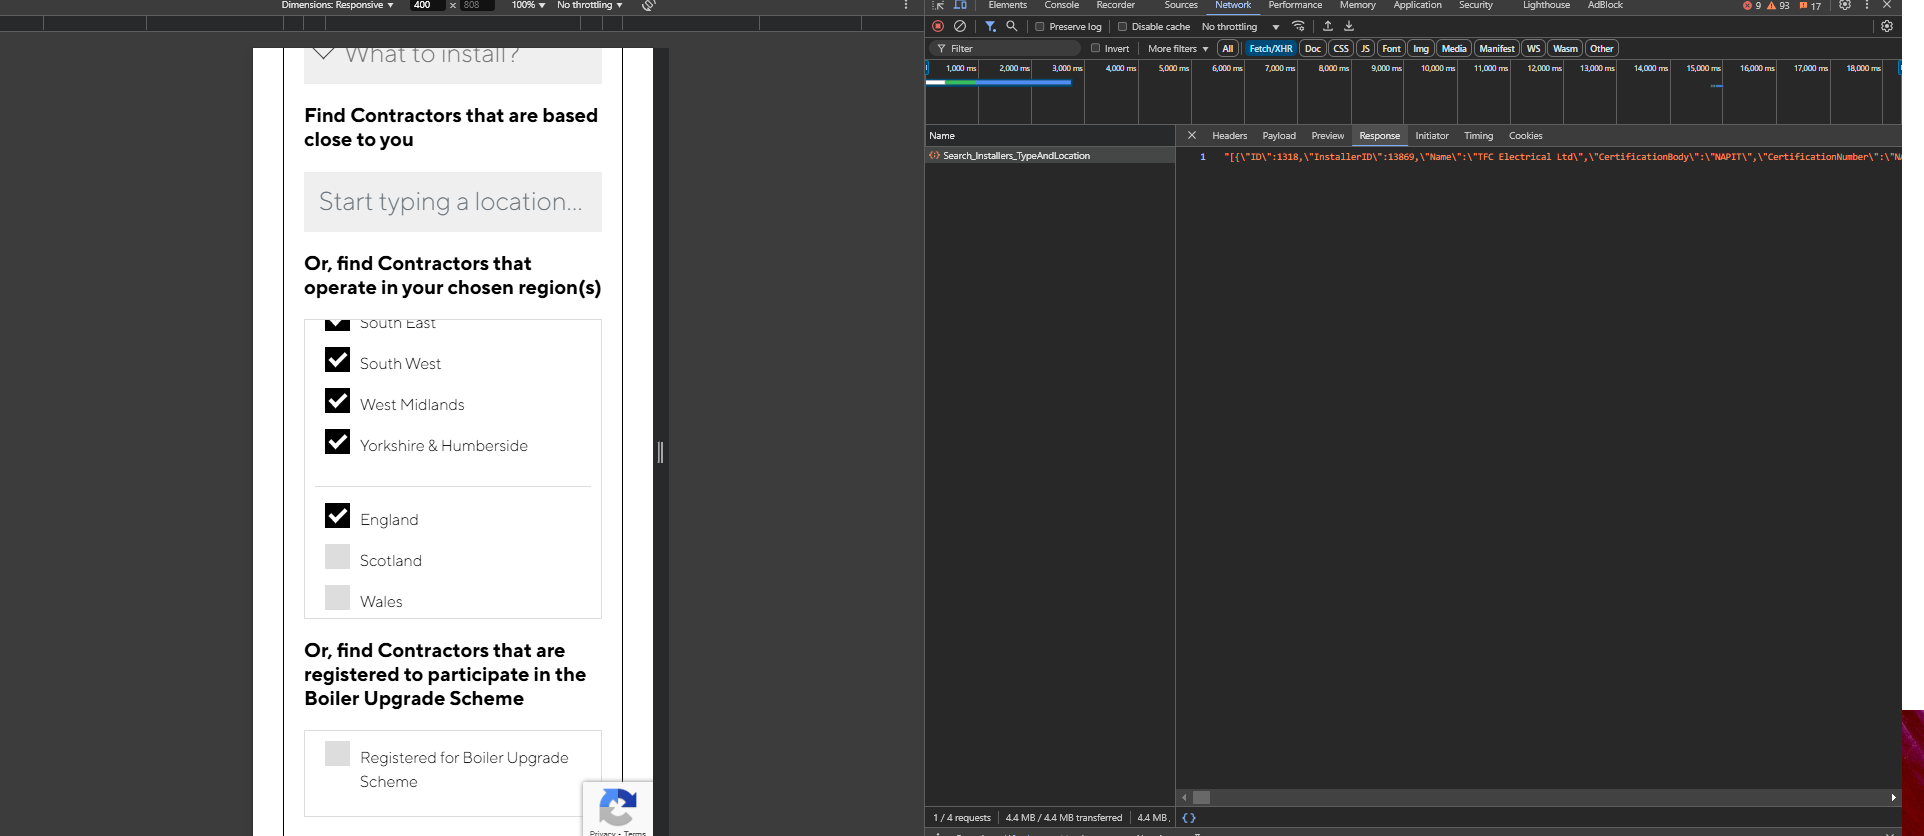

## Implementation

Make a copy of the cURL requests and modify the payload to have tech and location as a parameter in the method `BaseRequestsScript.get_contractor_details`.


In [27]:

import sys
sys.path.insert(0, 'C:\Repos\MSCCertifiedScrape\Scripts')
from BaseRequestsScript import get_contractor_details
import json
import codecs
import requests
import random
import os
import itertools
import time

selected_tech_all = ["ASHP","Battery","Biomass","EAHP","GAHP","WSHP","MicroCHP","SAHP","SolarPV","SolarThermal","WindTurbine"]

regions_all = ["Eastern","EastMidlands","London","NorthEast","NorthWest","SouthEast","SouthWest","WestMidlands","YorkshireHumberside","Scotland","Wales","NorthernIreland"]


proxies = requests.get(
                    "https://proxy.webshare.io/api/v2/proxy/list/?mode=direct&country_code__in=GB",
                    headers={ "Authorization": os.environ.get("Webshare") }
                    ).json()['results']

def get_proxy(proxies):
    ip = random.choice(proxies)
    return (f"http://{ip['username']}:{ip['password']}@{ip['proxy_address']}:{ip['port']}"
            , ip['country_code']) 


In [22]:
#pull data for all tech and all regions
for tech, region in list(itertools.product(selected_tech_all,regions_all)):
    proxy = get_proxy(proxies)[0]
    z = get_contractor_details(tech=tech, region=region, proxies= {"http": proxy, "https": proxy})
    file_name = "C:\Repos\MSCCertifiedScrape\Data\contractor_data_{}_{}.json".format(tech,region)
    with open(file_name, 'w') as f:
        json.dump(z, f)
    time.sleep(20)

In [ ]:
#copy json output into csvs for client
import pathlib

for file in pathlib.Path("C:\Repos\MSCCertifiedScrape\Data").glob('*.json'):
    with open(file , 'r') as f:
        data = f.read().rstrip()
    cleaned_string = data.replace('\\', '')[2:-2]
    df = pd.read_json(cleaned_string)
    df.to_csv(file.absolute().as_posix().replace(".json",".csv"))


In [4]:
# Combine all data sources
import glob
import pandas as pd
csv_files = glob.glob("C:\Repos\MSCCertifiedScrape\Data\*.csv")  # Change this path
# Create an empty list to store DataFrames
dataframes = []
# Loop through files and append them
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combine all DataFrames by appending
final_df = pd.concat(dataframes, ignore_index=True)  # Ignore index to avoid duplicates
final_df
final_df.drop(final_df.columns[0], axis=1, inplace=True)

In [ ]:
#Create csv file with combined data
final_df.to_csv("C:\Repos\MSCCertifiedScrape\Data\CombinedDataRaw.csv")

#installers can appear in multiple regions 
final_df.drop_duplicates().to_csv("C:\Repos\MSCCertifiedScrape\Data\Cleaned\CombinedData.csv")

In [37]:
#verify count 
test1 = pd.read_csv("C:\Repos\MSCCertifiedScrape\Data\contractor_data_WindTurbine_WestMidlands.csv")
len(test1.index)

9

### Compare to data available on site

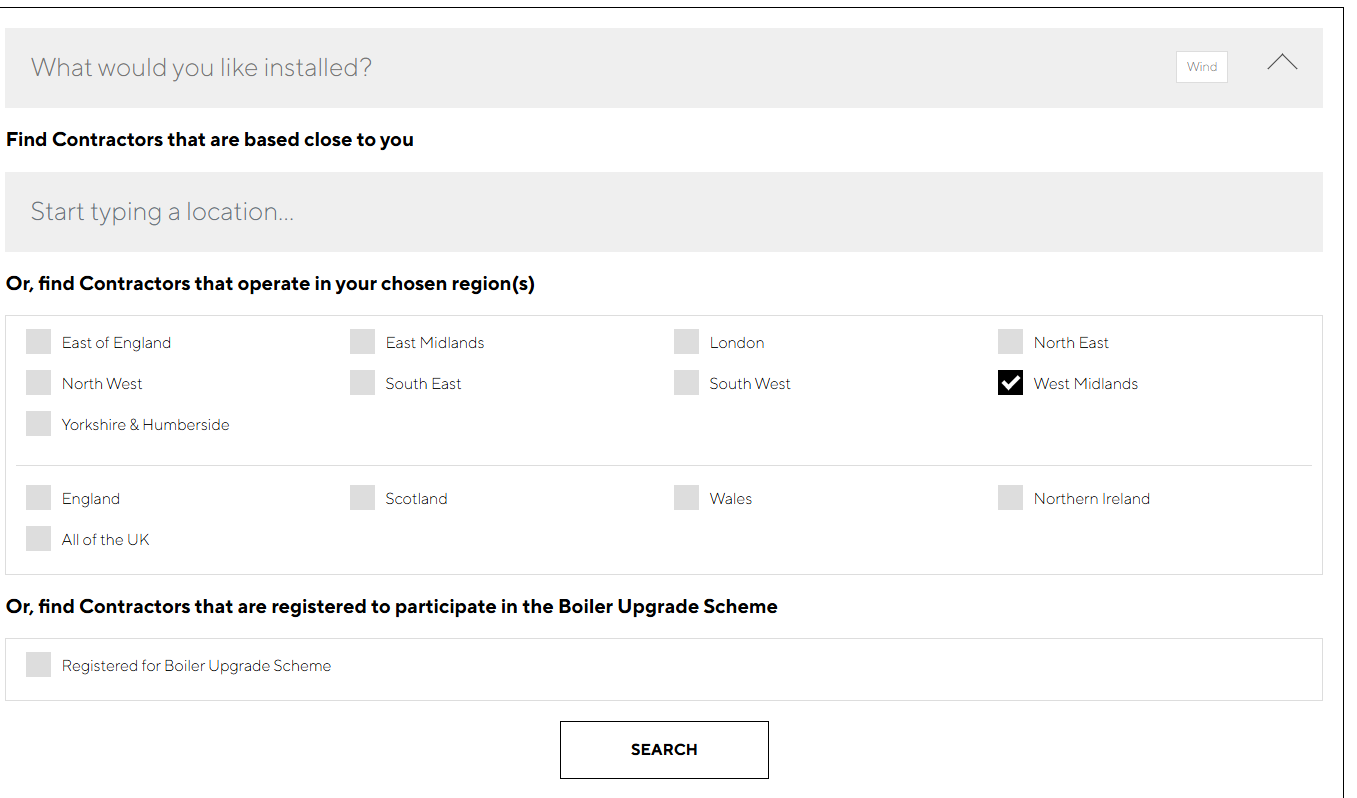

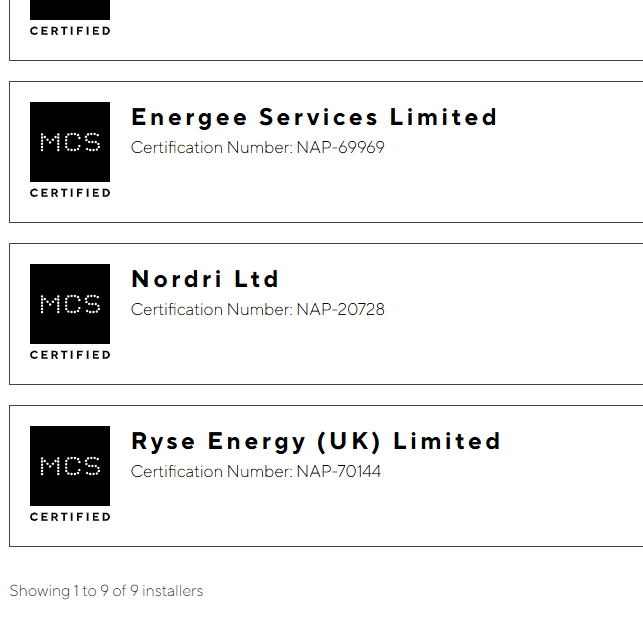

In [36]:
#verify count 
test2 = pd.read_csv("C:\Repos\MSCCertifiedScrape\Data\contractor_data_WSHP_NorthWest.csv")
len(test2.index)

326

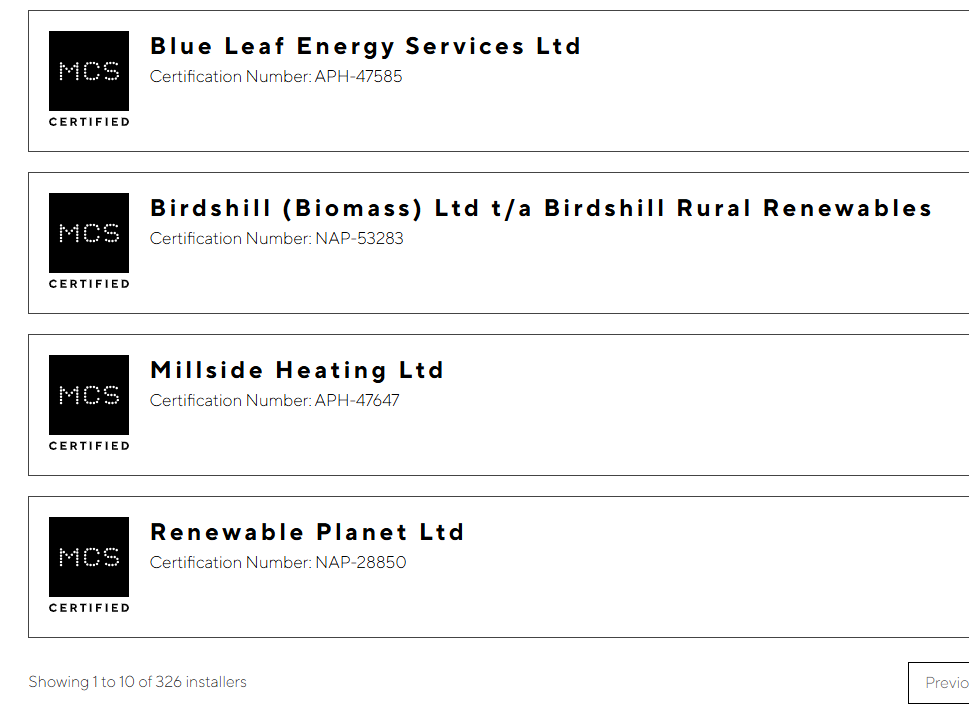